In [1]:
#Importing necessary libraries.
import pandas as pd
import numpy as np
#Reading the dataset.
womendataset = pd.read_csv('WomensclothReviews.csv')
#Displaying the dimension of the original dataset.
print ("Dimension of the data set is: ", womendataset.shape)


Dimension of the data set is:  (23486, 11)


In [2]:
#Creating new dataset of only Review Text and Recommended IND. 
newwomendata= womendataset [['Review Text', 'Recommended IND']]
#Removing missing values.
newwomendata.dropna (inplace=True)
print ("Dimension of the new data set is:", newwomendata.shape)


Dimension of the new data set is: (22641, 2)


C:\Users\CDAC\AppData\Local\Temp\ipykernel_9028\4226281092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newwomendata.dropna (inplace=True)


In [3]:
print (newwomendata.head())

                                         Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1


In [6]:
#Converting the Review Text column into a string data type. 
newwomendata['Review Text']=newwomendata['Review Text'].astype (dtype='str')
#Converting the text to lower case.
lower_list=[]
for word in newwomendata['Review Text']: 
    lower_data = word. lower ()
    lower_list.append(lower_data)
lowercasedata=pd.DataFrame (lower_list) 
newwomendata['Review Text']=lowercasedata


C:\Users\CDAC\AppData\Local\Temp\ipykernel_9028\1024668160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newwomendata['Review Text']=newwomendata['Review Text'].astype (dtype='str')
C:\Users\CDAC\AppData\Local\Temp\ipykernel_9028\1024668160.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newwomendata['Review Text']=lowercasedata


In [8]:
#Considering the data of only first 18000 rows.
sentiments = newwomendata['Recommended IND'].values[:18000] 
reviews = newwomendata['Review Text'].values[:18000]


In [9]:
#Creating training and test datasets.
reviews_trg = reviews [:14000]
reviews_test = reviews [14000:] 
sentiments_trg = sentiments [:14000]
sentiments_test = sentiments [14000:]

In [10]:
#Determining the dimension of training and test datasets. 
print ("Dimension of reviews training data: ", reviews_trg.shape) 
print ("Dimension of reviews test data: ",reviews_test.shape)
print ("Dimension of sentiments training data: ", sentiments_trg.shape) 
print ("Dimension of sentiments test data: ", sentiments_test.shape)

Dimension of reviews training data:  (14000,)
Dimension of reviews test data:  (4000,)
Dimension of sentiments training data:  (14000,)
Dimension of sentiments test data:  (4000,)


In [11]:
#Importing necessary libraries.
import re
import nltk
import numpy as np


In [12]:
#Creating a function for performing stemming.
ps =nltk.porter. PorterStemmer ()
def func_stemming (text, stemmer=ps):
    text=''.join([stemmer.stem (word) for word in text.split()])
    return text


In [13]:
#Creating a function for removing special characters.
def func_special_characters (text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]' 
    text = re.sub (pattern, '', text)
    return text


In [14]:
#Creating a list of English stop words from the corpus.
stop_words = nltk.corpus.stopwords.words ('english')
#Removing words like 'no' and 'not' from the list of English stop words. 
stop_words.remove('no')
stop_words.remove('not')


In [16]:
#Creating a function for removing stop words.
def func_stopwords (text, stopwords=None):
    tokens =nltk.word_tokenize (text)
    tokens = [token. strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopwords] 
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


In [24]:
#Creating text preprocessing function. 
def func_text_process (document):
    #Converting to lower case. 
    document = document.lower()
    #Removing extra newlines.
    document = document.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')
    #Remove special characters and/or digits.
    document = func_special_characters (document, remove_digits=True)
    #Stemming of text data using the function.
    document = func_stemming (document)
    #Removing stop words using the function.
    document = func_stopwords (document, stopwords=stop_words)
    #Removing extra whitespace.
    document = re.sub(r'\s+', ' ', document)
    document = document.strip ()
    return document


In [26]:
#Vectorizing the document.
text_process = np.vectorize(func_text_process)

In [27]:
#Calling the text processing function for training and test datasets. 
process_train_reviews = text_process(reviews_trg)
process_test_reviews = text_process(reviews_test)

In [32]:
#Importing libraries for feature Extraction: CountVectorizer, TFIDF Vectorizer. 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Using Count Vectorizer on train and test datasets.
cv = CountVectorizer () 
cv_train_features=cv.fit_transform (process_train_reviews)
cv_test_features = cv. transform (process_test_reviews)
print('CV model: Train features:', cv_train_features.shape, 
      'Test features:', cv_test_features.shape)
#Building TFIDF features with TFIDF Vectorizer on train and test datasets.
tv = TfidfVectorizer (use_idf=True, min_df=1, max_df=0.9, ngram_range=(1,2),
                      sublinear_tf=True) 
tv_train_features=tv.fit_transform(process_train_reviews)
tv_test_features = tv.transform(process_test_reviews)


CV model: Train features: (14000, 13996) Test features: (4000, 13996)


In [33]:
print('TFIDF model: Train features:', tv_train_features.shape,
      'Test features:', tv_test_features.shape)


TFIDF model: Train features: (14000, 13996) Test features: (4000, 13996)


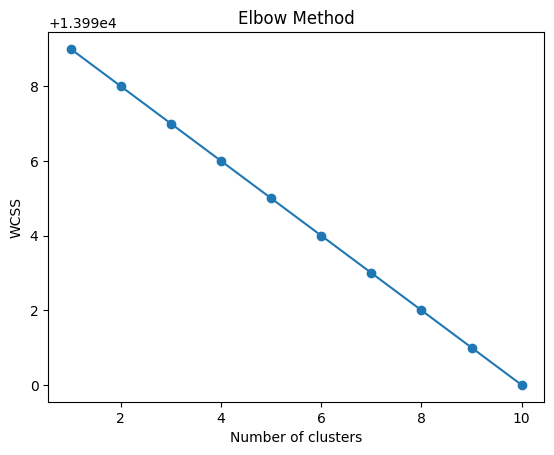

In [36]:
#Importing necessary libraries. 
from sklearn.cluster import KMeans 
from collections import Counter 
import matplotlib.pyplot as plt
#Determining optimum value of k using elbow method. 
from sklearn.cluster import KMeans
list1=[]
for i in range (1,11):
    kmeans=KMeans (n_clusters=i, random_state=42) 
    kmeans.fit (tv_train_features)
    list1.append(kmeans.inertia_) #inertia= WCSS
#Creating a plot.
plt.plot(range (1,11), list1, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [40]:
#Importing necessary libraries. 
import tensorflow as tf 
import transformers
import tqdm
from keras.preprocessing import sequence
# Creating a function.
def func_tokenizer(tokenizer_name, docs):
    features = []
    for doc in tqdm.tqdm (docs, desc="Converting documents to features"): 
        tokens= tokenizer_name.tokenize(doc)
        ids = tokenizer_name.convert_tokens_to_ids(tokens)
        features.append(ids)
    return features
print ("The function is created successfully")


The function is created successfully


In [38]:
import transformers
#Initializing a Bert Tokenizer.
bert_tokenizer = transformers.BertTokenizer.from_pretrained ('bert-base-uncased') 



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\CDAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\CDAC\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

NameError: name 'func_tokenizer' is not defined

In [41]:
#Calling the function to tokenize the data.
bert_trg_features= func_tokenizer(bert_tokenizer, reviews_trg) 
bert_test_features= func_tokenizer(bert_tokenizer, reviews_test)

Converting documents to features: 100%|██████████████████████████████████████████| 4000/4000 [00:02<00:00, 1361.32it/s]


In [42]:
#Converting to a sequence.
bert_trg =sequence.pad_sequences(bert_trg_features, maxlen=500) 
bert_test= sequence.pad_sequences(bert_test_features, maxlen=500)

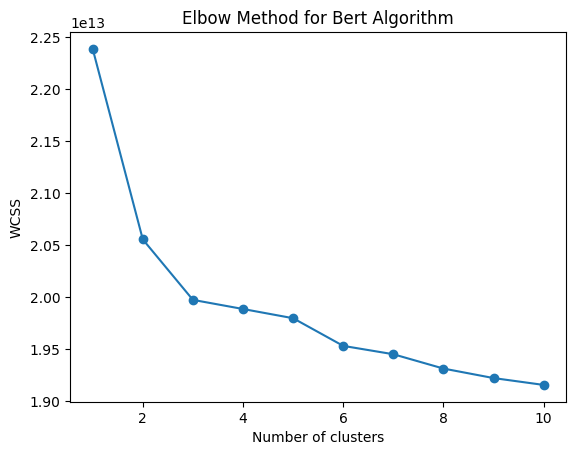

In [44]:

#Importing necessary libraries.
from sklearn.cluster import KMeans 
from collections import Counter 
import matplotlib.pyplot as plt
#Determining optimum value of k using elbow method. 
from sklearn.cluster import KMeans
list1=[]
for i in range (1,11):
    kmeans= KMeans (n_clusters=i, random_state=42) 
    kmeans.fit(bert_trg)
    list1.append(kmeans. inertia_)
#Creating a plot.
plt.plot(range (1,11), list1, marker='o') 
plt.title('Elbow Method for Bert Algorithm') 
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS')
plt.show()


In [46]:
#Doing k-means clustering for optimum value of k.
kmeans =KMeans(n_clusters=2, max_iter=100, random_state=42).fit(bert_trg)


In [47]:
Counter(kmeans.labels_)

Counter({np.int32(1): 7758, np.int32(0): 6242})